# Importing All Necessary Libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Imported the Dataset 

In [7]:
agri = pd.read_csv("Pakistan Agricultural Ground Truthing Survey Data 2022-2023.csv", encoding="ISO-8859-1")

# Overview of the Dataset 

In [9]:
agri.head()

,ID,Season,Province,District,Date,Latitude,Longitude,Code,Land,Description,Stage
0,3-324-20-2-19082023-1-1,Kharif,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.449521,71.907877,6,Builtup,Builtup,NaN
1,3-324-20-2-19082023-1-2,Kharif,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.430481,71.904408,3,Cropland,Sugarcane,Peak Growth
2,3-324-20-2-19082023-1-3,Kharif,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.428686,71.901710,3,Cropland,Sugarcane,Peak Growth
3,3-324-20-2-19082023-1-4,Kharif,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.428596,71.896705,6,Builtup,Builtup,NaN
4,3-324-20-2-19082023-1-5,Kharif,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.427846,71.897687,3,Cropland,Sugarcane,Peak Growth


# Summary Statistics 

In [13]:
agri.describe()

,Latitude,Longitude,Code
count,136822.000000,136822.000000,136822.000000
mean,29.221921,70.107234,3.616063
std,2.773811,2.187491,3.509792
min,24.129792,64.758615,1.000000
25%,27.386015,68.216775,1.000000
50%,28.673093,69.407136,2.000000
75%,31.309931,72.032498,6.000000
max,35.623886,74.879176,23.000000


# Basic Information of the Data

In [15]:
agri.isnull().sum()

ID                 0
Season             0
Province           0
District           0
Date               0
Latitude           0
Longitude          0
Code               0
Land               0
Description        0
Stage          33708
dtype: int64

# Rows and Columns in the Dataset 

In [17]:
agri.shape

(136822, 11)

# Checking the Missing Values

In [24]:
agri_train = agri[agri["Stage"].notnull()]
agri_missing = agri[agri["Stage"].isnull()]

# Normalization of the Dataset (Label Encoding)

In [26]:
encoder = LabelEncoder()
agri_train["Season"] = encoder.fit_transform(agri_train["Season"])
agri_missing["Season"] = encoder.transform(agri_missing["Season"])


C:\Users\DELL\AppData\Local\Temp\ipykernel_10012\38763966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_train["Season"] = encoder.fit_transform(agri_train["Season"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_10012\38763966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_missing["Season"] = encoder.transform(agri_missing["Season"])


# Splitting Training and Test Data

In [28]:
X_train = agri_train[["Season"]]  
y_train = agri_train["Stage"]  

# Appling Algorithums (RFC)

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Prediction (Applying trained model on unseen dataset)

In [32]:
agri_missing["Stage"] = rf_model.predict(agri_missing[["Season"]])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10012\2221192599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_missing["Stage"] = rf_model.predict(agri_missing[["Season"]])


In [34]:
agri_filled = pd.concat([agri_train, agri_missing])

# Save the Cleaned Dataset 

In [607]:
agri_filled.to_csv("imputed_dataset.csv", index=False)

# Above all code was made as the part of preprocessing. Becuase there were around 33708 missing values in the dataset. I used Random Forest Classifier for missing value imputation. 

# Cleaned Dataset

# Importing the dataset

In [1043]:
agri1 = pd.read_csv("imputed_dataset.csv")  

In [1045]:
agri1.head()

,ID,Season,Province,District,Date,Latitude,Longitude,Code,Land,Description,Stage
0,3-324-20-2-19082023-1-2,0,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.430481,71.904408,3,Cropland,Sugarcane,Peak Growth
1,3-324-20-2-19082023-1-3,0,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.428686,71.901710,3,Cropland,Sugarcane,Peak Growth
2,3-324-20-2-19082023-1-5,0,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.427846,71.897687,3,Cropland,Sugarcane,Peak Growth
3,3-324-20-2-19082023-1-6,0,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.428890,71.894260,3,Cropland,Sugarcane,Peak Growth
4,3-324-20-2-19082023-1-7,0,Khyber Pakhtunkhwa,Malakand,19/08/2023,34.428791,71.890851,3,Cropland,Sugarcane,Peak Growth


# Rechecking the Missing Values (After RFC has applied) 

In [1047]:
agri1.isnull().sum()

ID             0
Season         0
Province       0
District       0
Date           0
Latitude       0
Longitude      0
Code           0
Land           0
Description    0
Stage          0
dtype: int64

#### Now, see there is no missing value in the dataset. I have correctly applied the Random Forest Classifier Algorithum. 

# Summary Statistics

In [1049]:
agri1.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,136822.0,0.320796,0.466784,0.000000,0.000000,0.000000,1.000000,1.000000
Latitude,136822.0,29.221921,2.773811,24.129792,27.386015,28.673093,31.309931,35.623886
Longitude,136822.0,70.107234,2.187491,64.758615,68.216775,69.407136,72.032498,74.879176
Code,136822.0,3.616063,3.509792,1.000000,1.000000,2.000000,6.000000,23.000000


In [1051]:
agri1["Season"].value_counts()

Season
0    92930
1    43892
Name: count, dtype: int64

In [1053]:
agri1["Stage"].value_counts()

Stage
Peak Growth                            73912
Reproductive                           24746
Sowing                                 15670
Mature                                 10872
Vegetation                              5683
Harvested                               2859
Initial                                 1897
Other                                    693
Ploughing                                255
Dont know                               233
Vegetative                                 1
initial stage with canopy cover 20%        1
Name: count, dtype: int64

In [1055]:
agri1["Province"].value_counts()

Province
Punjab                50565
Sindh                 46954
Balochistan           25440
Khyber Pakhtunkhwa    13863
Name: count, dtype: int64

# Data Visualization

### 1️⃣ Distribution of Crop Growth Stages

D:\ Anacona Navigator\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


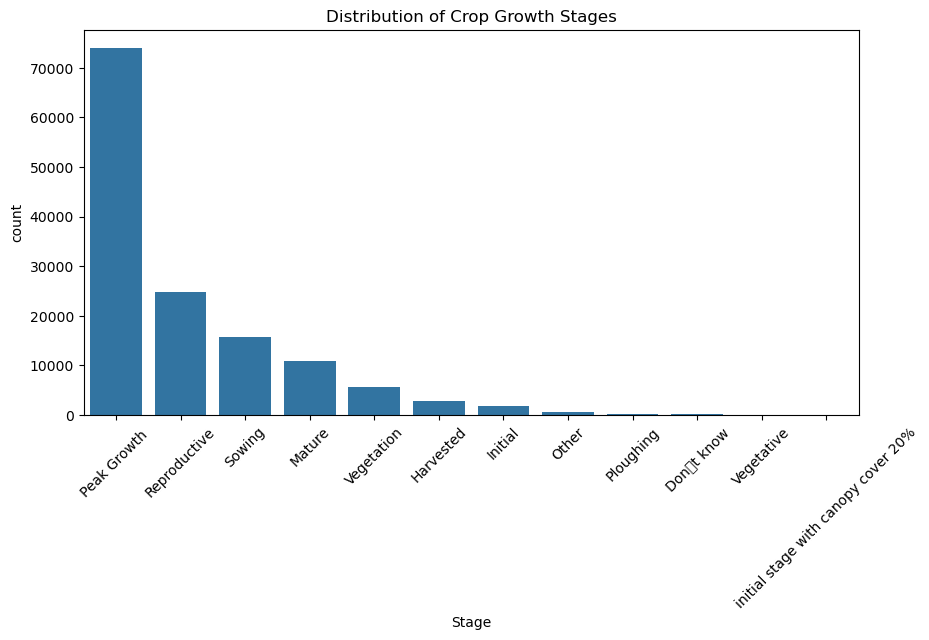

In [1057]:
plt.figure(figsize=(10, 5))
sns.countplot(x=agri1["Stage"], order=agri1["Stage"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Crop Growth Stages")
plt.show()

### 2️⃣ Crop Stages per Season

D:\ Anacona Navigator\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


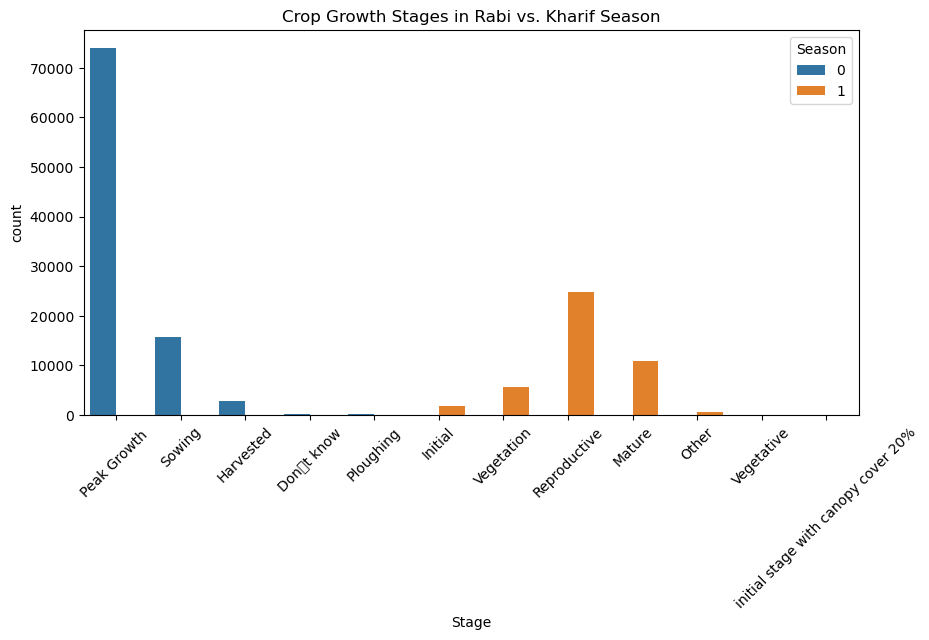

In [1061]:
plt.figure(figsize=(10, 5))
sns.countplot(x=agri1["Stage"], hue=agri1["Season"])
plt.xticks(rotation=45)
plt.title("Crop Growth Stages in Rabi vs. Kharif Season")
plt.show()

### 3️⃣ Geospatial Distribution of Data

D:\ Anacona Navigator\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


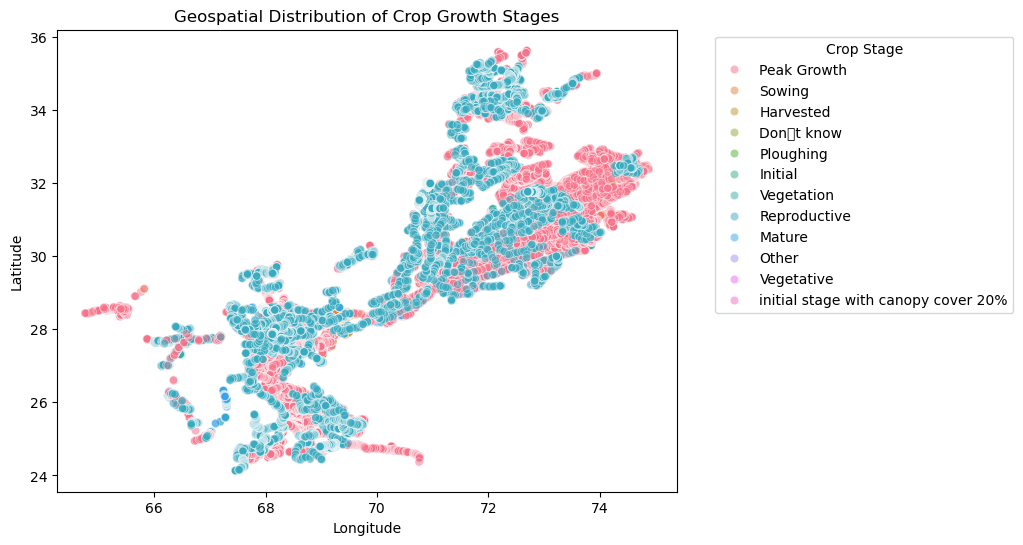

In [1063]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x=agri1["Longitude"], y=agri1["Latitude"], hue=agri1["Stage"], alpha=0.5)
plt.legend(title="Crop Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Geospatial Distribution of Crop Growth Stages")
plt.show()

### 4️⃣ Growth Stage Trend Over Time


C:\Users\DELL\AppData\Local\Temp\ipykernel_10012\2686741393.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  agri1["Date"] = pd.to_datetime(agri1["Date"])


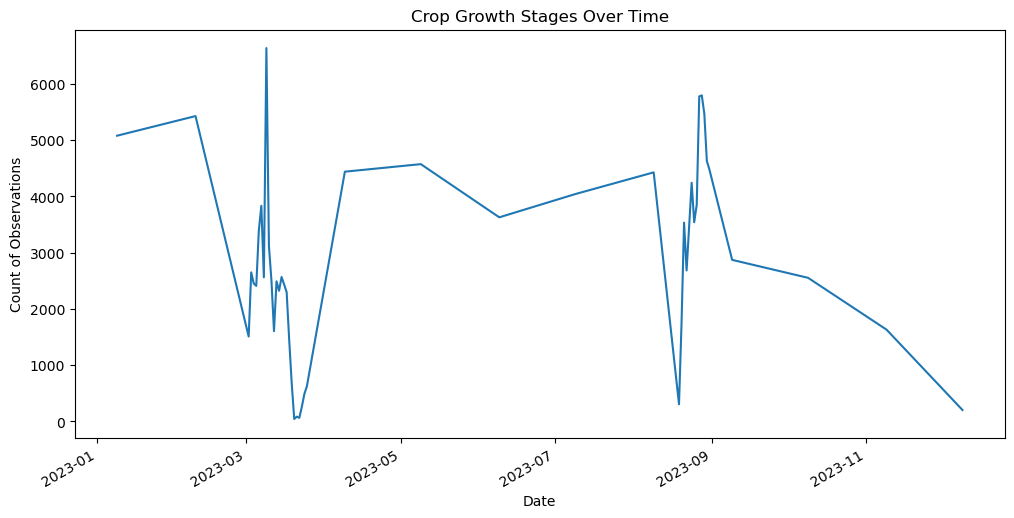

In [1065]:
agri1["Date"] = pd.to_datetime(agri1["Date"])  

plt.figure(figsize=(12, 6))
agri1.groupby("Date")["Stage"].count().plot()
plt.title("Crop Growth Stages Over Time")
plt.xlabel("Date")
plt.ylabel("Count of Observations")
plt.show()

# Preparing Dataset for Applying Temporal Convolutional Networks (TCN) for Crop Growth Stage Prediction

### Date and Time Formating 

#### We converting "Date" to datetime format so the model can understand time-based patterns properly. Sorting the data chronologically ensures that time-dependent relationships are maintained, which is crucial for time-series models like TCN.

In [1067]:
agri1["Date"] = pd.to_datetime(agri1["Date"])
agri1 = agri1.sort_values(by="Date").reset_index(drop=True)

In [1069]:
agri1.head()

,ID,Season,Province,District,Date,Latitude,Longitude,Code,Land,Description,Stage
0,5-515-21-2-01092023-1-3079,0,Sindh,Shaheed Benazir Abad,2023-01-09,26.083522,68.205274,6,Builtup,Builtup,Peak Growth
1,5-516-23-2-01092023-1-2252,0,Sindh,Shikarpur,2023-01-09,27.911884,68.819260,10,Water,Water,Peak Growth
2,5-516-23-2-01092023-1-2258,0,Sindh,Shikarpur,2023-01-09,27.933937,68.814032,5,Barrenland,Barren,Peak Growth
3,5-516-23-2-01092023-1-2259,0,Sindh,Shikarpur,2023-01-09,27.939283,68.810601,5,Barrenland,Barren,Peak Growth
4,5-516-23-2-01092023-1-2261,0,Sindh,Shikarpur,2023-01-09,27.948056,68.809637,5,Shrub,Shrub,Peak Growth


# Checking Unique Values in Categorical Data Columns

In [1071]:
def uni_values(column_name):
    return agri1[column_name].unique()

In [1073]:
uni_values('Province')

array(['Sindh', 'Punjab', 'Khyber Pakhtunkhwa', 'Balochistan'],
      dtype=object)

In [1075]:
uni_values('District')

array(['Shaheed Benazir Abad', 'Shikarpur', 'Mianwali', 'Rahim Yar Khan',
       'Sujawal', 'Hafizabad', 'Swat', 'Mardan', 'Badin', 'Sohbatpur',
       'Khuzdar', 'Toba Tek Singh', 'Charsadda', 'Jhal Magsi',
       'Upper Dir', 'Kharan', 'Nowshera', 'Gujranwala', 'Sanghar',
       'Rajanpur', 'Kohat', 'Multan', 'Swabi', 'Sialkot', 'Kachhi',
       'Lodhran', 'Sibi', 'Larkana', 'Tando Mohammad Khan', 'Shahdadkot',
       'Jacobabad', 'Khanewal', 'Okara', 'Khushab', 'Chakwal', 'Jhang',
       'Sahiwal', 'Lower Dir', 'Malakand', 'Jaffarabad', 'Mirpur Khas',
       'Umerkot', 'Nasirabad', 'Peshawar', 'Ghotki', 'Vehari',
       'Bahawalpur', 'Bhakkar', 'Buner', 'Chiniot', 'Sargodha',
       'Khairpur', 'Muzaffargarh', 'Haripur', 'Kashmore', 'Bahawalnagar',
       'Layyah', 'Attock', 'Dadu', 'Thatta', 'Dera Bugti', 'Lasbela',
       'Mansehra', 'Faisalabad', 'Barkhan', 'Malir', 'Jamshoro',
       'Dera Ghazi Khan', 'Dera Ismail Khan', 'FR Kohat',
       'Naushahro Feroze', 'Abbottabad', 'Hyd

In [1077]:
uni_values('Land')

array(['Builtup', 'Water', 'Barrenland', 'Shrub', 'Orchard', 'Fallowland',
       'Grassland', 'Forest', 'Cropland', 'Shrubs'], dtype=object)

In [1079]:
uni_values('Description')

array(['Builtup', 'Water', 'Barren', 'Shrub', 'Mango', 'Dates',
       'Fallow (Agriculture)', 'Grassland', 'Lemon', 'FALSA', 'Guava',
       'Forest', 'FLOOD WATER', 'Apple', 'Peach', 'RIVER BED',
       'Graveyard', 'PLUM & LOQUAT', 'Plum', 'Eucalyptus', 'MAIZE & PLUM',
       'PERSIMMON', 'Pomegranate', 'Orange (Citrus)', 'Banana', 'Rice',
       'Cotton', 'Sugarcane', 'Maize (Corn)', 'Millet', 'Pigeon Pea',
       'Sorghum', 'FODDER', 'YAM', 'PEAR & RICE', 'Onion', 'Chillies',
       'Jantar', 'Guarseed', 'Sesame (Til)', 'MAIZE FODDER', 'Mong bean',
       'LOQUAT AND PEACH', 'LYCHEE', 'PLUM AND MAIZE', 'Mountain',
       'Apricot', 'MOTT GRASS', 'RHODES GRASS', 'Cow pea',
       'SUGARCANE & MAZE', 'Euclyptus', 'MAIZE AND PEACH', 'Bitter Gourd',
       'Bottle Gourd', 'Loquat', 'NATURAL VEGETATION', 'Pear',
       'PEACH & MAZE', 'GUAVA & PASIMON', 'MANGO & PLUM', 'MUD HILL',
       'Jujube', 'Spinach', 'NAPIER GRASS (FODDER)', 'Ridge gourd',
       'Ground nuts/Peanuts', 'Ginger'

In [1081]:
uni_values('Stage')

array(['Peak Growth ', 'Sowing', 'Harvested', 'Don\x92t know',
       'Ploughing', 'Reproductive', 'Vegetation', 'Mature', 'Initial',
       'Other', 'Vegetative', 'initial stage with canopy cover 20%'],
      dtype=object)

###  Convert 'Stage' into Ordinal Categories (Because it has Natural Order)

In [1083]:
# Convert Stage to category type
agri1['Stage'] = agri1['Stage'].astype('category')

# Convert categories to numerical codes
agri1['Stage'] = agri1['Stage'].cat.codes

# Final check
print("Final unique values in Stage:", agri1['Stage'].unique())

Final unique values in Stage: [ 5  8  1  0  6  7  9  3  2  4 10 11]


# Importing few more necessary libraries

In [1085]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Flatten, Dense

In [1087]:
agri1.head()

,ID,Season,Province,District,Date,Latitude,Longitude,Code,Land,Description,Stage
0,5-515-21-2-01092023-1-3079,0,Sindh,Shaheed Benazir Abad,2023-01-09,26.083522,68.205274,6,Builtup,Builtup,5
1,5-516-23-2-01092023-1-2252,0,Sindh,Shikarpur,2023-01-09,27.911884,68.819260,10,Water,Water,5
2,5-516-23-2-01092023-1-2258,0,Sindh,Shikarpur,2023-01-09,27.933937,68.814032,5,Barrenland,Barren,5
3,5-516-23-2-01092023-1-2259,0,Sindh,Shikarpur,2023-01-09,27.939283,68.810601,5,Barrenland,Barren,5
4,5-516-23-2-01092023-1-2261,0,Sindh,Shikarpur,2023-01-09,27.948056,68.809637,5,Shrub,Shrub,5


In [1089]:
from sklearn.model_selection import KFold

def target_encode_multiple(df, cat_columns, target_column, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    for cat_column in cat_columns:
        df[cat_column] = df[cat_column].astype(str).str.strip()  
        df[cat_column + "_Encoded"] = 0.0  
        for train_idx, val_idx in kf.split(df):
            train_fold = df.iloc[train_idx]
            val_fold = df.iloc[val_idx]
            means = train_fold.groupby(cat_column)[target_column].mean()
            df.loc[val_idx, cat_column + "_Encoded"] = df.loc[val_idx, cat_column].map(means)

        global_means = df.groupby(cat_column)[target_column].mean()
        df.loc[:, cat_column + "_Encoded"] = df[cat_column].map(global_means)  

    return df

categorical_columns = ['District', 'Land', 'Description']  
agri1 = target_encode_multiple(agri1, categorical_columns, 'Stage')

In [1091]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
agri1['Province'] = label_encoder.fit_transform(agri1['Province'])

In [1093]:
agri.columns

Index(['ID', 'Season', 'Province', 'District', 'Date', 'Latitude', 'Longitude',
       'Code', 'Land', 'Description', 'Stage'],
      dtype='object')

In [1095]:
agri1.columns

Index(['ID', 'Season', 'Province', 'District', 'Date', 'Latitude', 'Longitude',
       'Code', 'Land', 'Description', 'Stage', 'District_Encoded',
       'Land_Encoded', 'Description_Encoded'],
      dtype='object')

# Retaining the Encoded Columns

In [1097]:
Encoded_agri1 = agri1

# Removing Unnecessary Columns 

In [1099]:
agri1.head(1)

,ID,Season,Province,District,Date,Latitude,Longitude,Code,Land,Description,Stage,District_Encoded,Land_Encoded,Description_Encoded
0,5-515-21-2-01092023-1-3079,0,3,Shaheed Benazir Abad,2023-01-09,26.083522,68.205274,6,Builtup,Builtup,5,5.017601,5.535951,5.536242


In [1101]:
agri1.columns

Index(['ID', 'Season', 'Province', 'District', 'Date', 'Latitude', 'Longitude',
       'Code', 'Land', 'Description', 'Stage', 'District_Encoded',
       'Land_Encoded', 'Description_Encoded'],
      dtype='object')

In [1103]:
columns_to_drop = ['ID','District','Code','Description\t', 'Description'] 
agri1 = agri1.drop(columns=columns_to_drop, errors='ignore')
print("Final Columns:", agri1.columns.tolist())

Final Columns: ['Season', 'Province', 'Date', 'Latitude', 'Longitude', 'Land', 'Stage', 'District_Encoded', 'Land_Encoded', 'Description_Encoded']


In [1105]:
columns_to_drop = ['Land'] 
agri1 = agri1.drop(columns=columns_to_drop, errors='ignore')

# Data having Latitude, Longitude

In [1107]:
agri1_L_L = agri1 

# Removing  Latitude, Longitude to make it more pure for Temporal Convolutional Networks

In [1109]:
columns_to_drop = ['Latitude', 'Longitude']
agri1 = agri1.drop(columns=columns_to_drop, errors='ignore')

In [1111]:
agri1.head()

,Season,Province,Date,Stage,District_Encoded,Land_Encoded,Description_Encoded
0,0,3,2023-01-09,5,5.017601,5.535951,5.536242
1,0,3,2023-01-09,5,7.294218,5.734399,5.804684
2,0,3,2023-01-09,5,7.294218,5.752693,5.000000
3,0,3,2023-01-09,5,7.294218,5.752693,5.000000
4,0,3,2023-01-09,5,7.294218,5.389719,5.257188


# Once I deployed the model, I found that model in overfitted. I found the issue of class imbalance, due to which 'Mature' a one value from Stage feature got overfitted.

# Balance the Dataset

## 1️⃣ Remove Extremely Rare Stages (Stage 10 and Stage 11)

In [1151]:
mask = ~np.isin(y_train, [10, 11])
X_train = X_train[mask]
y_train = y_train[mask]

print("Updated training label distribution:", Counter(y_train))


Updated training label distribution: Counter({5: 51381, 7: 24746, 8: 11449, 3: 10872, 9: 5683, 1: 2361, 2: 1897, 4: 693, 6: 214, 0: 155})


# Create Time-Series Sequences for TCN

In [1168]:
def create_sequences(data, target_column, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length]["Season"].values.reshape(-1, 1)) 
        y.append(data.iloc[i+seq_length][target_column])  
    return np.array(X), np.array(y)

X, y = create_sequences(agri1, target_column="Stage", seq_length=5)

print("Input Shape:", X.shape) 
print("Target Shape:", y.shape) 

Input Shape: (136817, 5, 1)
Target Shape: (136817,)


# Split Data into Training and Testing Sets

In [1170]:
y = np.array(y)
most_frequent_label = Counter(y[~np.isnan(y)]).most_common(1)
y = np.nan_to_num(y,nan=most_frequent_label)
y = y.astype(int)
print("Final unique labels in y:", np.unique(y))

Final unique labels in y: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [1172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print("Training Labels:", np.unique(y_train))
print("Testing Labels:", np.unique(y_test))

Training Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Testing Labels: [0 1 5 6 8]


# Build the TCN Model

In [1174]:
from tensorflow.keras import Input

num_classes = len(np.unique(y))


model = Sequential([
    Input(shape=(5, 1)), 
    Conv1D(filters=64, kernel_size=3, dilation_rate=1, padding="causal", activation="relu"),
    BatchNormalization(),
    Conv1D(filters=64, kernel_size=3, dilation_rate=2, padding="causal", activation="relu"),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")  
])

# Compile the Model

In [1176]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the TCN Model

In [1180]:
history = model.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))

Epoch 1/20
3649/3649 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.6930 - loss: 0.8793 - val_accuracy: 0.8232 - val_loss: 0.5515
Epoch 2/20
3649/3649 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6925 - loss: 0.8553 - val_accuracy: 0.8232 - val_loss: 0.5544
Epoch 3/20
3649/3649 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6939 - loss: 0.8515 - val_accuracy: 0.8232 - val_loss: 0.5568
Epoch 4/20
3649/3649 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6939 - loss: 0.8496 - val_accuracy: 0.8232 - val_loss: 0.5550
Epoch 5/20
3649/3649 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6952 - loss: 0.8509 - val_accuracy: 0.8232 - val_loss: 0.5511
Epoch 6/20
3649/3649 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6950 - loss: 0.8504 - val_accuracy: 0.8232 - val_loss: 0.5569
Epoch 7/20
3649/3649 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6949 - loss: 0.8493 - val_accuracy: 0.8232 - val_loss: 0.5634
Epoch 8/20
3649/3649 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.6953 - loss: 0

# Evaluate Model Performance

In [1182]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

856/856 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.4993
Test Accuracy: 0.8231983780860901


# Make Predictions

In [ ]:
agri1.columns

In [1184]:
import numpy as np
from collections import Counter

train_distribution = Counter(y_train)
test_distribution = Counter(y_test)

print("Training set label distribution:", train_distribution)
print("Testing set label distribution:", test_distribution)


Training set label distribution: Counter({5: 51381, 7: 24746, 8: 11449, 3: 10872, 9: 5683, 1: 2361, 2: 1897, 4: 693, 6: 214, 0: 155, 10: 1, 11: 1})
Testing set label distribution: Counter({5: 22526, 8: 4221, 1: 498, 0: 78, 6: 41})


# Model Deployment 

In [1192]:
import numpy as np
stage_reverse_mapping = {
    0: 'Ploughing',
    1: 'Sowing',
    2: 'Initial',
    3: 'Vegetative',
    4: 'Reproductive',
    5: 'Mature',
    6: 'Peak Growth',
    7: 'Harvested',
    8: "Don't know",
}  

y_pred = np.argmax(model.predict(X_test), axis=1)  # Get predicted class indices
y_pred_labels = [stage_reverse_mapping[label] for label in y_pred]
y_true_labels = [stage_reverse_mapping[label] for label in y_test]
for i in range(2):
    print(f"Actual: {y_true_labels[i]}, Predicted: {y_pred_labels[i]}")


856/856 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Actual: Mature, Predicted: Mature
Actual: Mature, Predicted: Mature


# ---------------------------------- The End ---------------------------------------

 # Model Performance Summary:

## Validation accuracy remains constant at 82.32%, suggesting a performance plateau.
## Training accuracy (~69%) is lower than validation accuracy, indicating potential underfitting or data leakage.
## Training loss decreases, but validation loss fluctuates slightly, meaning the model is learning but not improving significantly.
## Overall, the model performs well but could benefit from further tuning (e.g., more layers, regularization, or data balancing) for better generalization. 